<a href="https://colab.research.google.com/github/priyachittamuru/EDA-Analysis/blob/main/EDA_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Medical Cost Personal Datasets
**Source:** https://www.kaggle.com/datasets/mirichoi0218/insurance
\
**Objective**: Analyze factors affecting medical insurance costs.
\
**Content Columns**

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking - yes/ No

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance

In [412]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [413]:
data = pd.read_csv("/content/insurance.csv")

In [414]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the info we can see
1. The data has 1338 rows and 7 columns
2. There are no null values but has few colomns with categorial data




In [416]:
#Print the duplicated rows
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.56


In [417]:
# Print the duplicated rows with all columns having the same values
#print(data[data.duplicated(keep=False)])


keep Value	What Happens?
1. keep=True (default)	Keeps first occurrence as unique, marks only later ones as duplicate
2. keep=False	Marks all occurrences as duplicates
3. keep='first'	Same as keep=True (keeps first occurrence)
4. keep='last'	Keeps last occurrence, marks earlier ones as duplicate


✅ Use keep=False when you want to see all duplicate records together.

✅ Use keep=True or keep='first' when you only want to remove later occurrences.

✅ Use keep='last' when you want to keep the last occurrence and remove earlier ones.

In [418]:
data_clean = data.drop_duplicates()

In [419]:
data_clean.shape

(1337, 7)

In [420]:
data.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


1. From describing data we can see charges have a vast diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns


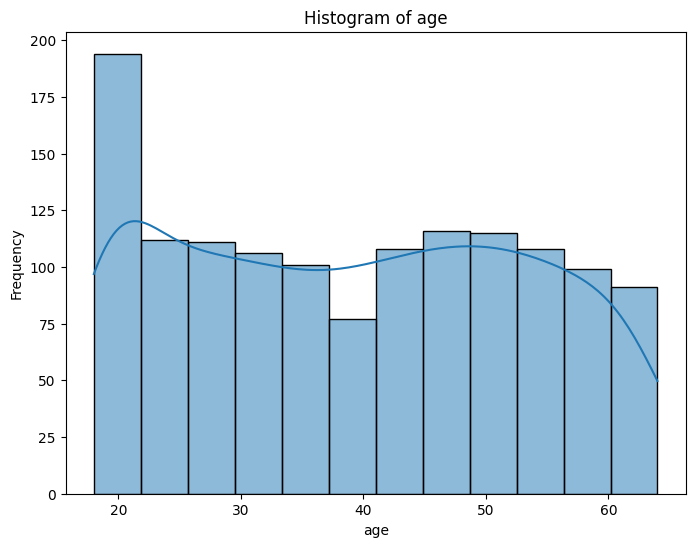

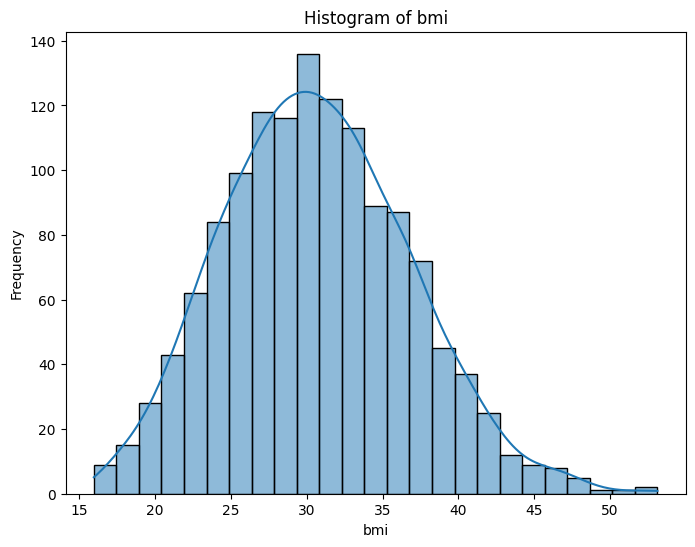

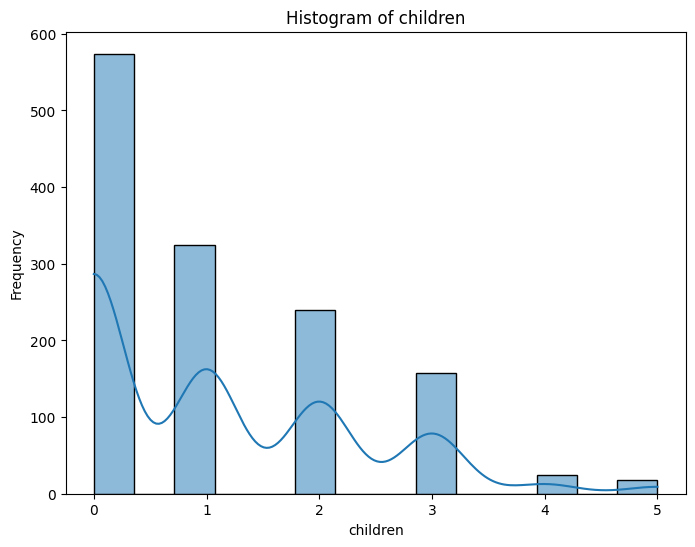

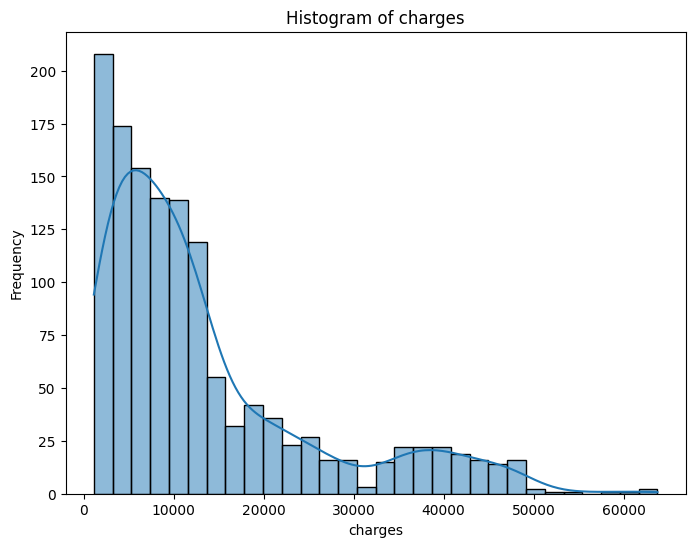

In [421]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From histogram
1. Age ranges from 20 to 60 and the age 20 is observed more from data  aprrox 190
2. Bmi ranges from 15 to 50 and the highest bmi is around 33 that is approx 130 and we could see slight skewness to the right at 45
3. Children counts ranges from 0 to 5 which most data having no children approx 590 and more users have 1, 2 and 3 children
4. Charges ranges from 0 to 60000 with highest charges values at approx 2500 with a frequency of above 200 and we can see it is skewed to the right

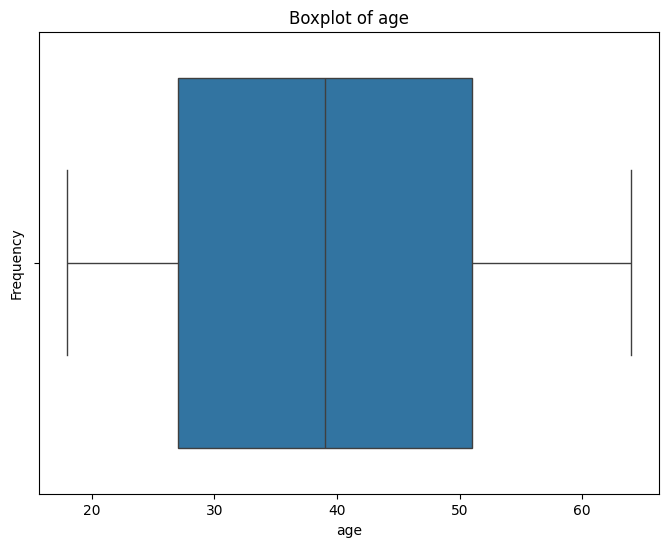

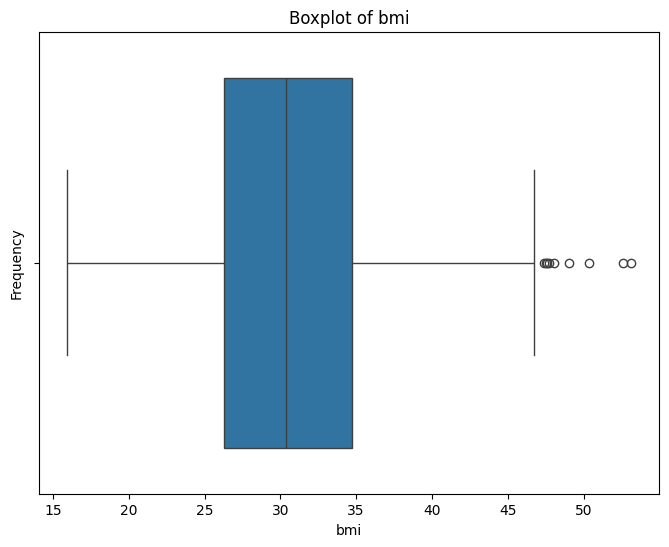

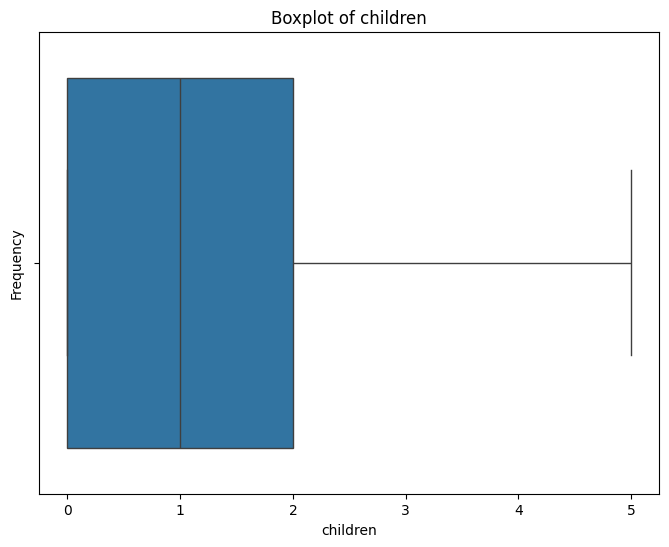

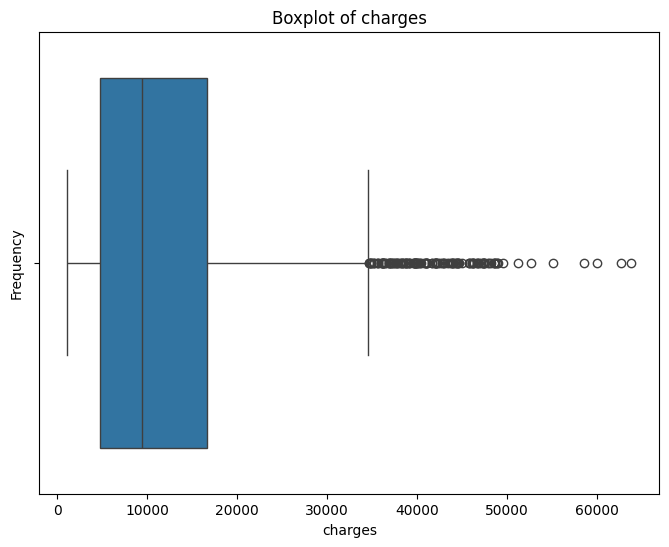

In [422]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can see few outliers present in bmi around above 45
2. Boxplot from charges shows more outliers present for above approx 35000

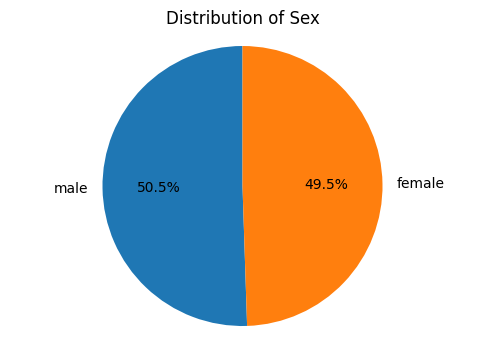

In [423]:
# Pie chart for distribution of sex
sex_counts = data['sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(sex_counts,labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

1. We can observe from the pie chart the percentage of male is more 50.5% compared to female 49.5%

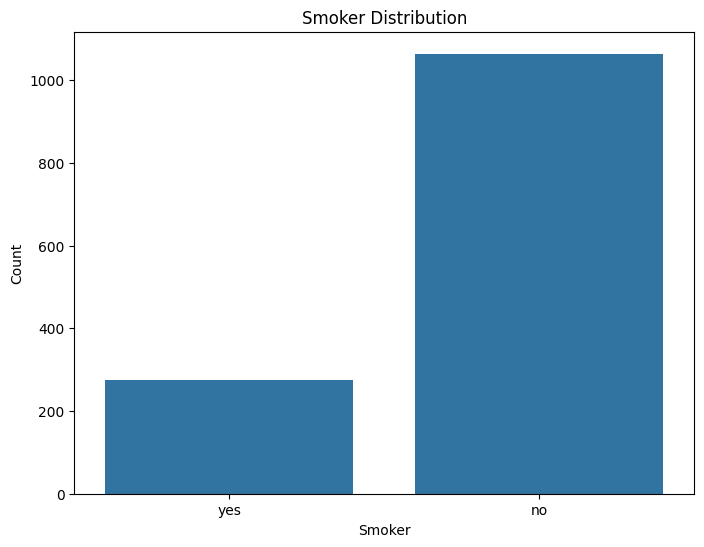

In [424]:
#Countlpot for smokers
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=data)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


From countplot more number of users dosen't smoke around above 1000 and only a few users are smokers with a count of appox less than 300

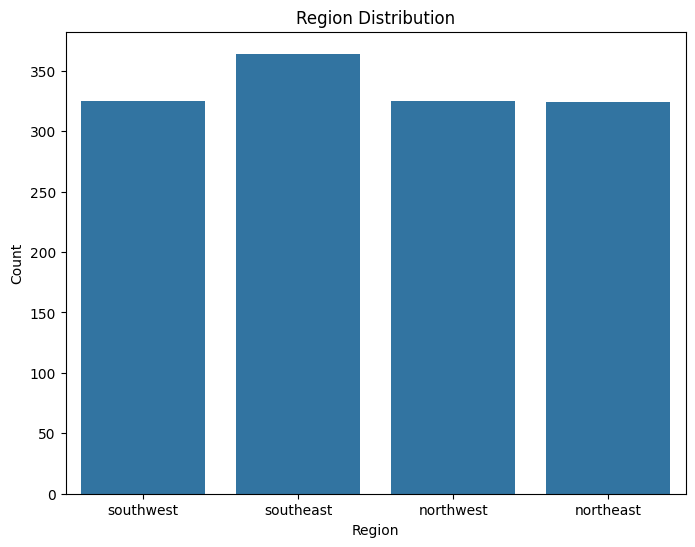

In [425]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=data)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

More number of users are from southeast of US aprrox above 350 while other regions are equally distributed around ~330

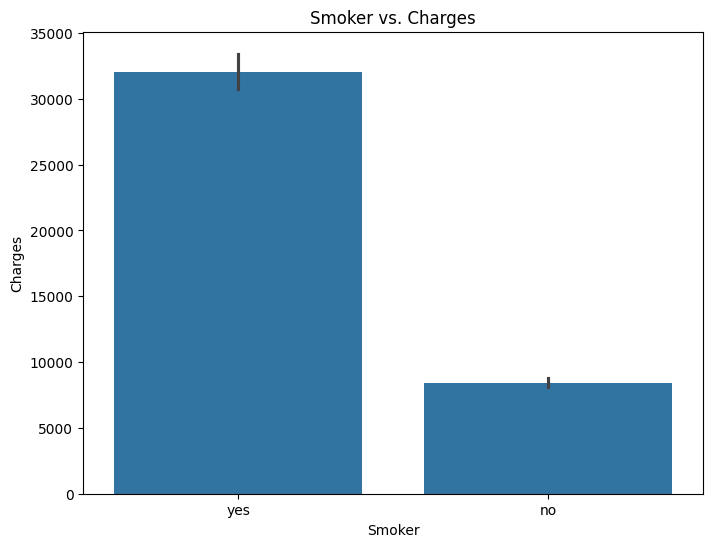

In [426]:
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=data)
plt.title('Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

from the barplot we can see users who are smokers have high charges around ~33000 while nonsmokers have charges around ~< 10000

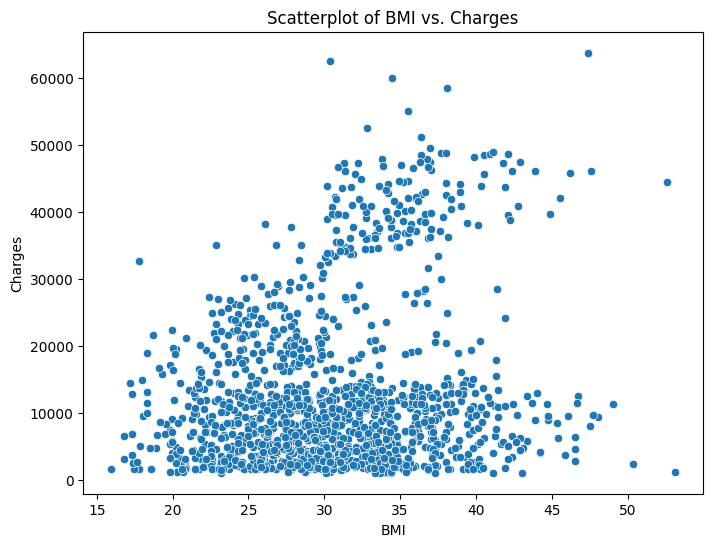

In [427]:
# Scatterplot  between bmi and charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Scatterplot of BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

More users with bmi ranges from 15 to ~50 have charges around ~10000

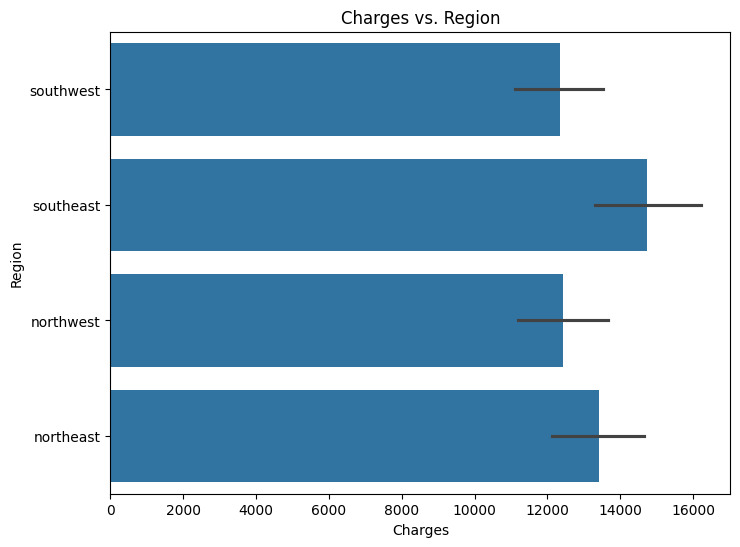

In [428]:
#barplot between charges and region
plt.figure(figsize=(8, 6))
sns.barplot(x='charges', y='region', data=data)
plt.title('Charges vs. Region')
plt.xlabel('Charges')
plt.ylabel('Region')
plt.show()

Users from southeast have high charges  above ~1400 compared to other , regions like northwest, southwest have less charges ~1200

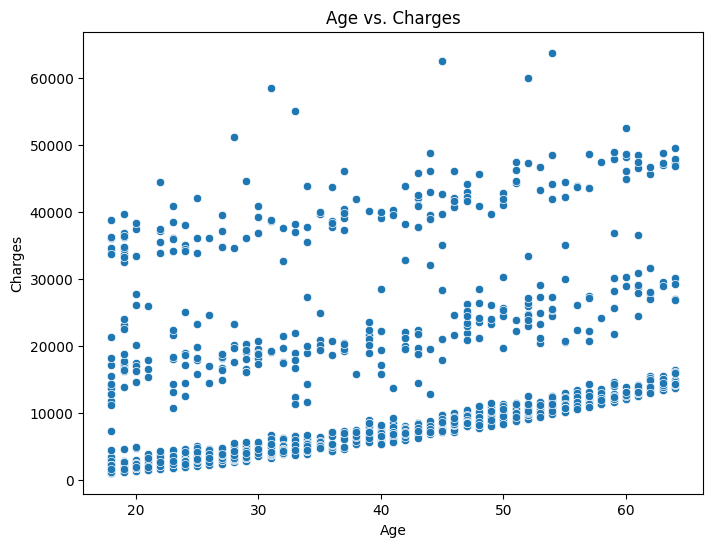

In [429]:
# Scatterplot  between age and charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

For all ages the charges are mostly concentrated between 0 to ~10000 and the other charges where data is concentrated is around ~>10000 to ~ 20000 , ~30000 to ~40000

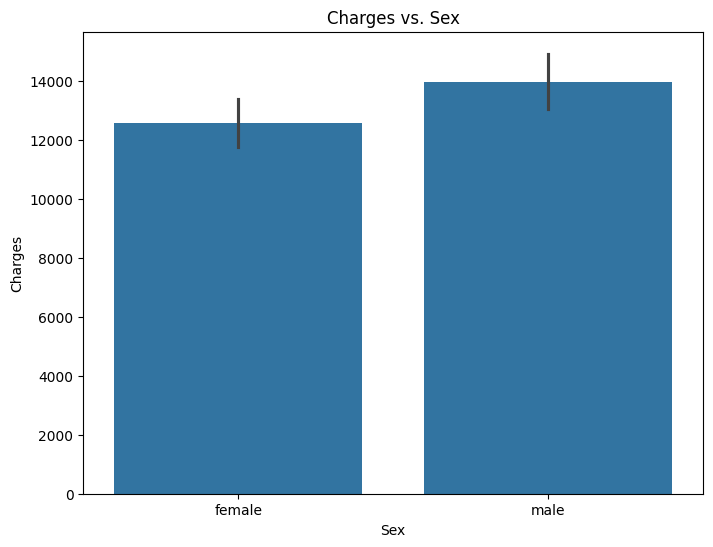

In [430]:
# charges  vs sex
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='charges', data=data)
plt.title('Charges vs. Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()


Male users has more charges compared to female , male around ~14000

In [431]:
# Display unique values for categorical columns
for col in ['sex', 'smoker', 'region']:
  print(f'Unique values for {col}: {data[col].unique()}')

Unique values for sex: ['female' 'male']
Unique values for smoker: ['yes' 'no']
Unique values for region: ['southwest' 'southeast' 'northwest' 'northeast']


In [432]:
# Use .loc for assigning numerical values to categorical columns
data_clean.loc[data_clean['sex'] == 'female', 'sex'] = 1
data_clean.loc[data_clean['sex'] == 'male', 'sex'] = 0

data_clean.loc[data_clean['smoker'] == 'yes', 'smoker'] = 1
data_clean.loc[data_clean['smoker'] == 'no', 'smoker'] = 0

data_clean.loc[data_clean['region'] == 'southwest', 'region'] = 1
data_clean.loc[data_clean['region'] == 'southeast', 'region'] = 2
data_clean.loc[data_clean['region'] == 'northwest', 'region'] = 3
data_clean.loc[data_clean['region'] == 'northeast', 'region'] = 4

In [446]:
#Converting the data types of object colomn to numeric
data_clean['sex']=pd.to_numeric(data_clean['sex'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data_clean['smoker']=pd.to_numeric(data_clean['smoker'],errors='coerce')
data_clean['region']=pd.to_numeric(data_clean['region'],errors='coerce')

In [434]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [435]:
data_clean.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.00,1337.00,1337.00,1337.00,1337.00,1337.00,1337.00
mean,39.22,0.50,30.66,1.10,0.20,2.48,13279.12
std,14.04,0.50,6.10,1.21,0.40,1.11,12110.36
min,18.00,0.00,15.96,0.00,0.00,1.00,1121.87
25%,27.00,0.00,26.29,0.00,0.00,2.00,4746.34
50%,39.00,0.00,30.40,1.00,0.00,2.00,9386.16
75%,51.00,1.00,34.70,2.00,0.00,3.00,16657.72
max,64.00,1.00,53.13,5.00,1.00,4.00,63770.43


In [436]:
# fix and replace outlies for charges colomn
# Calculate the IQR for the 'charges' column
Q1 = data_clean['charges'].quantile(0.25)
Q3 = data_clean['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
data_clean['charges'] = np.where(data_clean['charges'] > upper_bound, upper_bound, data_clean['charges'])
data_clean['charges'] = np.where(data_clean['charges'] < lower_bound, lower_bound, data_clean['charges'])


In [437]:
# fix and replace outliers for bmi column
# Calculate the IQR for the 'bmi' column
Q1 = data_clean['bmi'].quantile(0.25)
Q3 = data_clean['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
data_clean['bmi'] = np.where(data_clean['bmi'] > upper_bound, upper_bound, data_clean['bmi'])
data_clean['bmi'] = np.where(data_clean['bmi'] < lower_bound, lower_bound, data_clean['bmi'])


Using IQR Method to fix outliers if outliers are on the extreme points use IQR method where we subtract third quartile(75%) and first quartile(25%) to get Iqr value then calulate upperbound and lowerbound values
The IQR method is used to detect and remove outliers in a dataset. It focuses on the middle 50% of the data and filters out extreme values.

Steps to Detect Outliers Using IQR
1. Find Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Lower Quartile (25% of data is below this)
Q3 = Upper Quartile (75% of data is below this)
2.  Calculate IQR:
* IQR=Q3−Q1

This gives the range of the middle 50% of values.

3. Set Outlier Boundaries:
* Lower Bound:
 * Q1−1.5×IQR
* Upper Bound:
 * Q3+1.5×IQR
4. Remove Outliers:

Any value below the lower bound or above the upper bound is considered an outlier.

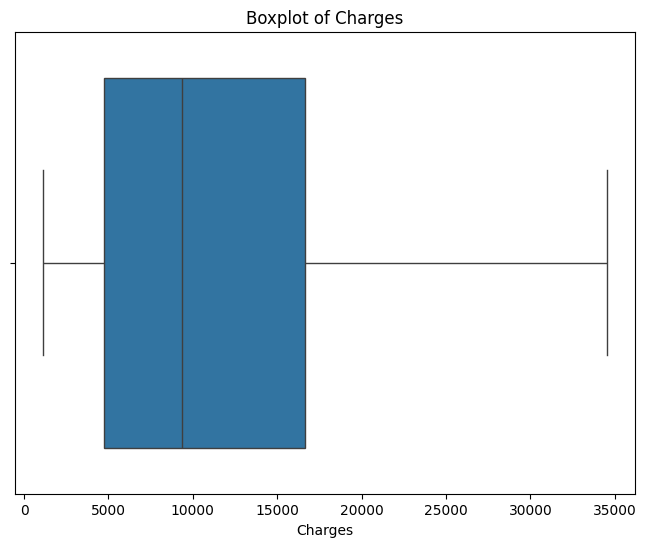

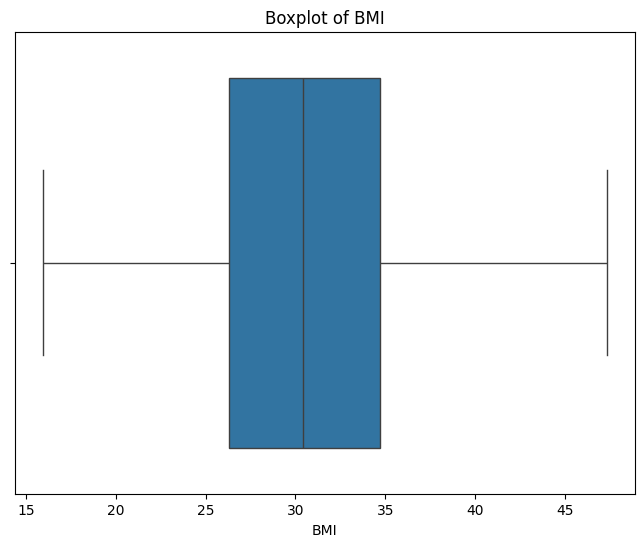

In [438]:
# boxplot of charges and bmi

plt.figure(figsize=(8, 6))
sns.boxplot(x='charges', data=data_clean)
plt.title('Boxplot of Charges')
plt.xlabel('Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi', data=data_clean)
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()


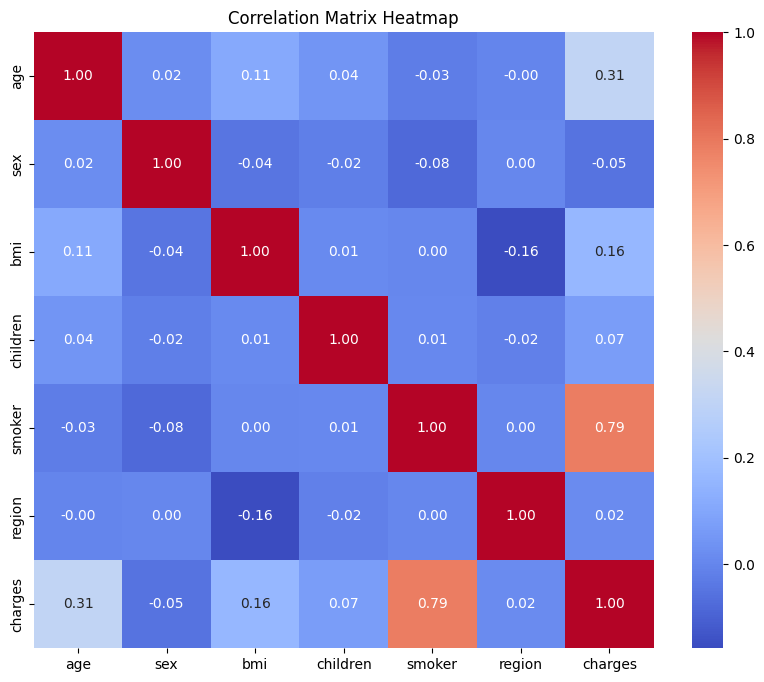

In [439]:
# Create the heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

1. Smoking and charges have high correlation of 0.79
2. Bmi and age has corr of 0.16 and 0.31 which is compaaritively less than smoking

In [440]:
# Round the 'charges' column to 2 decimal places
data_clean['charges'] = data_clean['charges'].round(2)

In [441]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [442]:
#data_clean['log_charges'] = np.log(data_clean['charges'])

In [443]:
data_clean.values


array([[1.90e+01, 1.00e+00, 2.79e+01, ..., 1.00e+00, 1.00e+00, 1.69e+04],
       [1.80e+01, 0.00e+00, 3.38e+01, ..., 0.00e+00, 2.00e+00, 1.73e+03],
       [2.80e+01, 0.00e+00, 3.30e+01, ..., 0.00e+00, 2.00e+00, 4.45e+03],
       ...,
       [1.80e+01, 1.00e+00, 3.69e+01, ..., 0.00e+00, 2.00e+00, 1.63e+03],
       [2.10e+01, 1.00e+00, 2.58e+01, ..., 0.00e+00, 1.00e+00, 2.01e+03],
       [6.10e+01, 1.00e+00, 2.91e+01, ..., 1.00e+00, 3.00e+00, 2.91e+04]])

In [444]:
array = data_clean.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.02 1.   0.38 0.   1.   0.   0.47]
 [0.   0.   0.57 0.2  0.   0.33 0.02]
 [0.22 0.   0.54 0.6  0.   0.33 0.1 ]
 [0.33 0.   0.22 0.   0.   0.67 0.62]
 [0.3  0.   0.41 0.   0.   0.67 0.08]]


In [445]:
array = data_clean.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.44  1.01 -0.45 -0.91  1.97 -1.34  0.43]
 [-1.51 -0.99  0.52 -0.08 -0.51 -0.44 -1.06]
 [-0.8  -0.99  0.39  1.58 -0.51 -0.44 -0.79]
 [-0.44 -0.99 -1.31 -0.91 -0.51  0.47  0.93]
 [-0.51 -0.99 -0.29 -0.91 -0.51  0.47 -0.85]]


So factors affecting medical insurance costs smoker with high corr of 79% and the other two factors bmi and age has less corr so we can assume it's mostly dependendent on smokers.